In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 1
#%aimport 

# Empty attack on Adaline

In [2]:
import pickle

with open('../datasets/processed/trec2007-1607061515-features.dat', 'rb') as infile:
    X = pickle.load(infile)

with open('../datasets/processed/trec2007-1607061515-labels.dat', 'rb') as infile:
    Y = pickle.load(infile)

print('X is a %s \t %s' % (X.shape, type(X)))
print('Y is a %s \t %s' % (Y.shape, type(Y)))

X is a (75419, 10000) 	 <class 'numpy.ndarray'>
Y is a (75419, 1) 	 <class 'numpy.matrixlib.defmatrix.matrix'>


## prepare the dataset

In [3]:
## reduce dataset to go faster during prototyping
N_keep = 20000
x = X[:N_keep]
y = Y[:N_keep]

## the attack

In [4]:
percentage_poisoned = 0.1 ## percentage of the dataset under the attacker's control

N, D = x.shape ## number of N: samples, D: features
num_poisoned = int(N*percentage_poisoned)
empty_features = np.zeros((num_poisoned, D))

print(empty_features.shape)
empty_features

(2000, 10000)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
x = np.append(x, empty_features, axis=0)
print(x.shape)
x

(22000, 10000)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### the contamination assumption

In [6]:
poisoned_labels = np.ones((num_poisoned, 1))
print(poisoned_labels.shape)
poisoned_labels

(2000, 1)


array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

In [7]:
y = np.append(y, poisoned_labels, axis=0)
print(y.shape)
y

(22000, 1)


matrix([[ 1.],
        [ 0.],
        [ 1.],
        ..., 
        [ 1.],
        [ 1.],
        [ 1.]])

## training

In [15]:
add_bias = lambda x: np.insert(x, 0, values=1, axis=1) # add bias term
convert_labels = lambda y: y*2 - 1                     # Convert labels to 1 and -1

In [8]:
%aimport adaline
from adaline import max_iters

x = add_bias(a)
y = convert_labels(y)

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             rate=0.061,
                                             termination_condition=max_iters(100),
                                             verbose=True)

iteration 1:	cost = 1.000
iteration 2:	cost = 0.868
iteration 3:	cost = 0.767
iteration 4:	cost = 0.688
iteration 5:	cost = 0.623
iteration 6:	cost = 0.571
iteration 7:	cost = 0.526
iteration 8:	cost = 0.489
iteration 9:	cost = 0.457
iteration 10:	cost = 0.429
iteration 11:	cost = 0.404
iteration 12:	cost = 0.383
iteration 13:	cost = 0.363
iteration 14:	cost = 0.346
iteration 15:	cost = 0.331
iteration 16:	cost = 0.317
iteration 17:	cost = 0.304
iteration 18:	cost = 0.293
iteration 19:	cost = 0.282
iteration 20:	cost = 0.273
iteration 21:	cost = 0.264
iteration 22:	cost = 0.256
iteration 23:	cost = 0.248
iteration 24:	cost = 0.241
iteration 25:	cost = 0.235
iteration 26:	cost = 0.229
iteration 27:	cost = 0.223
iteration 28:	cost = 0.218
iteration 29:	cost = 0.213
iteration 30:	cost = 0.209
iteration 31:	cost = 0.204
iteration 32:	cost = 0.200
iteration 33:	cost = 0.196
iteration 34:	cost = 0.193
iteration 35:	cost = 0.189
iteration 36:	cost = 0.186
iteration 37:	cost = 0.183
iteration 

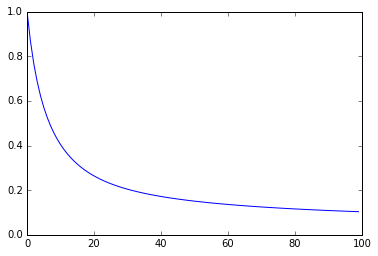

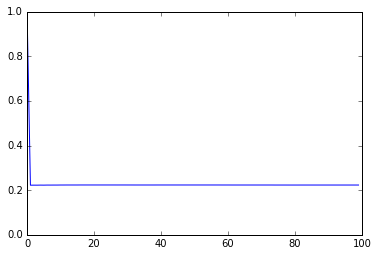

In [13]:
plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
plt.plot(error)
plt.ylim(0, error[0])
plt.show()

## testing

In [17]:
%aimport adaline

x_test = X[N_keep:N_keep+1000]
y_test = Y[N_keep:N_keep+1000]

x_test = add_bias(x_test)
y_test = convert_labels(y_test)

labels, cost = adaline.test_adaline(weights=weights, features=x_test)

In [18]:
## error
np.sum(y_test != labels)/x_test.shape[0] # mean error over samples

0.308